In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, accuracy_score, recall_score


In [2]:
df = pd.read_csv("BankChurners.csv")
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'],axis='columns')
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education_Level']= le.fit_transform(df['Education_Level'])
df['Gender']= le.fit_transform(df['Gender'])
df['Card_Category']= le.fit_transform(df['Card_Category'])
df['Income_Category']= le.fit_transform(df['Income_Category'])
df['Marital_Status']= le.fit_transform(df['Marital_Status'])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
k=df.groupby('Attrition_Flag').mean()
print(df[['Attrition_Flag','Gender']].groupby('Attrition_Flag').count())
k

                Gender
Attrition_Flag        
0                 8500
1                 1627


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,,,,,
0,46.262118,0.479059,2.335412,3.092118,1.457412,2.852353,0.181647,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
1,46.659496,0.428396,2.402581,3.119852,1.494776,2.924401,0.170252,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475


In [5]:

X=df.drop(['Attrition_Flag'],axis='columns')
y=df['Attrition_Flag']

In [6]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=42)

In [7]:
testdf = pd.concat([X_test,y_test],axis='columns')
k=testdf.groupby('Attrition_Flag').mean()
print(testdf[['Attrition_Flag','Gender']].groupby('Attrition_Flag').count())
k

                Gender
Attrition_Flag        
0                 1699
1                  327


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,,,,,
0,46.579164,0.466745,2.384344,3.14538,1.475574,2.928782,0.187758,36.021189,3.910536,2.258976,2.387287,8699.889935,1265.959388,7433.930547,0.770602,4601.972925,68.052384,0.742545,0.302961
1,45.495413,0.470948,2.431193,3.16208,1.593272,2.831804,0.217125,35.565749,3.287462,2.626911,2.932722,8165.156575,687.131498,7478.025076,0.683043,3403.128440,47.048930,0.555820,0.171349


In [8]:
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [9]:
def metrics_model(model, model_name, X=None, y=None):
    model.fit(X,y)
    print(f"\n===== {model_name} =====")
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    cm1 = cm(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sn.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


===== Decision Tree classifier =====
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.79      0.77      0.78       327

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026

Accuracy: 0.9294
Recall: 0.7737


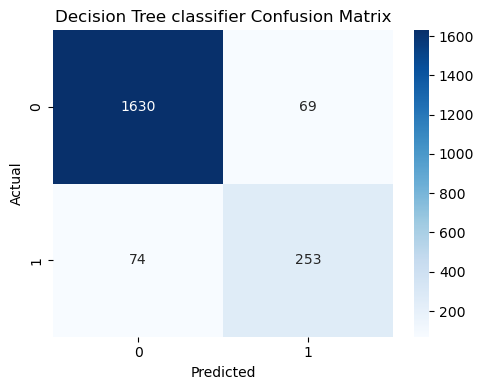


===== Random Forest Classifier =====
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.92      0.80      0.86       327

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy: 0.9571
Recall: 0.8012


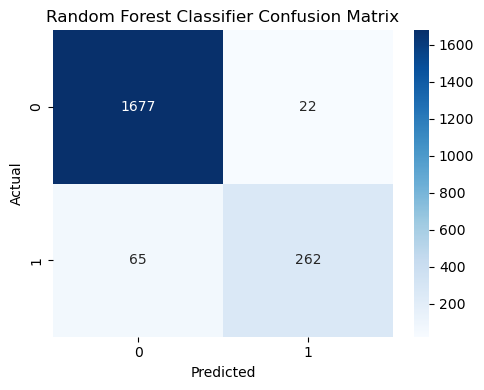

In [10]:
metrics_model(model_DT, "Decision Tree classifier", X=X_train, y=y_train)
metrics_model(model_RF , "Random Forest Classifier", X=X_train, y=y_train)

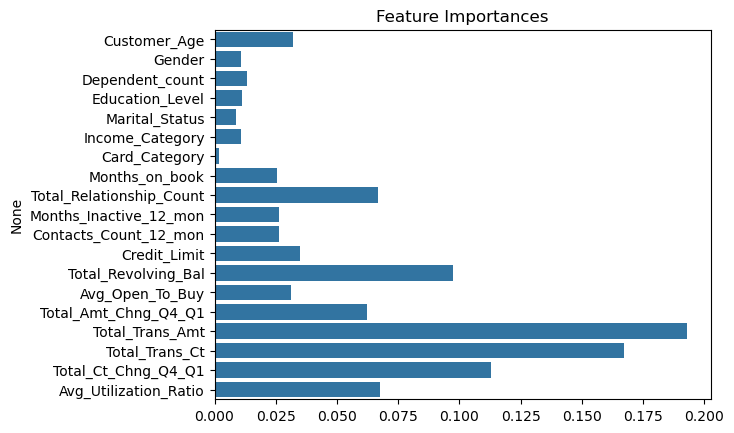

In [11]:
import matplotlib.pyplot as plt

importances = model_RF.feature_importances_
features = X.columns
sn.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()


### 🔍 model_DT Evaluation Summary (Random forest performed better)

- **Overall Accuracy**: **95.71%**
  The model_DT performs well in terms of overall accuracy, correctly predicting the outcome for most consumers.

- **Recall (Sensitivity)**: **80.12%**
  Since our goal is to detect **consumer churn**, **Recall is the most important metric** for us. A recall of 80.12% means that the model_DT is successfully identifying the majority of customers who are likely to churn.

- **Why Recall Matters More**
  In this scenario, **False Negatives** (i.e., predicting a customer will stay when they actually leave) are **more harmful** than False Positives. A false negative means we lose a customer without trying to retain them, which is what we want to avoid.
  On the other hand, a **False Positive** may result in unnecessary retention efforts, which is acceptable.